22.374780219780213
10.650555555555558
10.91878260869565
11.524375
10.63375


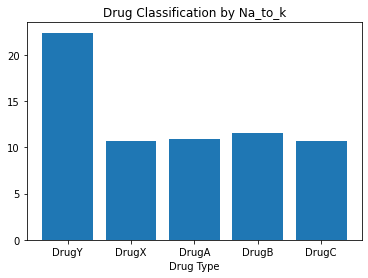

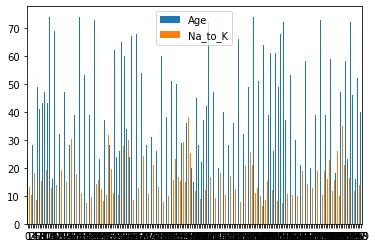

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

drugList = pd.read_csv("drug200.csv")

## Spliting into 5 groups
drugY = drugList.loc[drugList['Drug'] == "drugY"]
drugX = drugList.loc[drugList['Drug'] == "drugX"]
drugA = drugList.loc[drugList['Drug'] == "drugA"]
drugB = drugList.loc[drugList['Drug'] == "drugB"]
drugC = drugList.loc[drugList['Drug'] == "drugC"]


## Will use Na_to_K against ages with drugtype to do as classification
print(drugY['Na_to_K'].mean())
print(drugX['Na_to_K'].mean())
print(drugA['Na_to_K'].mean())
print(drugB['Na_to_K'].mean())
print(drugC['Na_to_K'].mean())

xAxis = ["DrugY", "DrugX", "DrugA", "DrugB", "DrugC"]
yAxis = [drugY['Na_to_K'].mean(), drugX['Na_to_K'].mean(), drugA['Na_to_K'].mean(), drugB['Na_to_K'].mean(), drugC['Na_to_K'].mean()]

# drugY.plot(x = 'Age', y='Na_to_K', label="drugY")
# drugX.plot(x = 'Age', y='Na_to_K', label="drugX")
# drugA.plot(x = 'Age', y='Na_to_K', label="drugA")
# drugB.plot(x = 'Age', y='Na_to_K', label="drugB")
# drugC.plot(x = 'Age', y='Na_to_K', label="drugC")

plt.bar(xAxis, yAxis)

plt.title("Drug Classification by Na_to_k")
plt.xlabel("Drug Type")

drugList.plot.bar(rot=0)

plt.savefig("drugClassification.pdf", format="pdf", bbox_inches="tight")

In [5]:
import sklearn.model_selection as model_selection

# Task 4, 5
drugList = pd.read_csv("drug200.csv")
drugList.BP = pd.Categorical(drugList.BP, ['LOW', 'NORMAL', 'HIGH'], ordered=True)
drugList.BP = drugList.BP.cat.codes
drugList.Cholesterol = pd.Categorical(drugList.Cholesterol, ['NORMAL', 'HIGH'], ordered=True)
drugList.Cholesterol = drugList.Cholesterol.cat.codes
drugList.Sex = pd.Categorical(drugList.Sex, ['F', 'M'], ordered=True)
drugList.Sex = drugList.Sex.cat.codes

print(drugList)

X = drugList[['Age','Sex','BP','Cholesterol','Na_to_K']]
Y = drugList['Drug']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y)

print(X_train)
print("\n\n\n\n Y_train:")
print(Y_train)

print("\n\n\n\n No Splitting:")
test, train = model_selection.train_test_split(drugList)
print(test)
print("\n\n\n\n Y_train:")
print(train)

     Age  Sex  BP  Cholesterol  Na_to_K   Drug
0     23    0   2            1   25.355  drugY
1     47    1   0            1   13.093  drugC
2     47    1   0            1   10.114  drugC
3     28    0   1            1    7.798  drugX
4     61    0   0            1   18.043  drugY
..   ...  ...  ..          ...      ...    ...
195   56    0   0            1   11.567  drugC
196   16    1   0            1   12.006  drugC
197   52    1   1            1    9.894  drugX
198   23    1   1            0   14.020  drugX
199   40    0   0            0   11.349  drugX

[200 rows x 6 columns]
     Age  Sex  BP  Cholesterol  Na_to_K
46    37    0   2            1   13.091
109   23    1   1            1   16.850
175   73    0   2            1   18.348
47    68    1   0            1   10.291
38    39    0   1            0    9.709
..   ...  ...  ..          ...      ...
18    23    1   0            1    7.298
96    58    0   0            1   38.247
10    47    0   0            1   11.767
66    29    

In [7]:
# Task 6, Gaussian NB

import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

print(X_train)
print("\n\n\n\n Y_train:")
print(Y_train)

GaussB = GaussianNB()
GaussB.fit(X_train, Y_train)
print(GaussB)

Y_expect = Y_test
Y_pred = GaussB.predict(X_test)

print (accuracy_score(Y_expect,Y_pred))


     Age  Sex  BP  Cholesterol  Na_to_K
46    37    0   2            1   13.091
109   23    1   1            1   16.850
175   73    0   2            1   18.348
47    68    1   0            1   10.291
38    39    0   1            0    9.709
..   ...  ...  ..          ...      ...
18    23    1   0            1    7.298
96    58    0   0            1   38.247
10    47    0   0            1   11.767
66    29    1   2            1   12.856
57    40    1   2            1   27.826

[150 rows x 5 columns]




 Y_train:
46     drugA
109    drugY
175    drugY
47     drugC
38     drugX
       ...  
18     drugC
96     drugY
10     drugC
66     drugA
57     drugY
Name: Drug, Length: 150, dtype: object
GaussianNB()
0.88


In [ ]:
# For decision Tree